In [83]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
import csv
import pickle
import warnings
import torch
import scipy
from scipy import optimize
from scipy.optimize import leastsq
from io import StringIO
from scipy.signal import savgol_filter
from datetime import datetime

now = datetime.now()
d_string = now.strftime("%d.%m.%Y")



## Load predictions and training data

In [84]:
#train_energy = pd.read_csv('Data/Results/%(now)s/train_energy.csv' % {"now": d_string}, header=None, names=['energy'])
#train_time = pd.read_csv('Data/Results/%(now)s/train_time.csv' % {"now": d_string}, header=None, names=['time'])
#N_train = len(train_energy)

In [204]:
path_1 = r'Data/Results/%(now)s/' % {"now": d_string} # use your path
path_2 = r'xyp1p2_all_e50000_round2_*'
all_files = glob.glob(path_1 + path_2)
li = []

for filename in all_files:
    df = pd.read_csv(filename, delimiter=",", skiprows=1, header=None, usecols=[0,1,2,3,4])
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
print(frame)

               0         1         2    3    4
0      -0.571214  0.102656  0.102833  0.1  2.0
1       0.299703  0.102790  0.102469  0.1  2.0
2      -0.107796  0.103107  0.102478  0.1  2.0
3      -0.528998  0.106378  0.104495  0.1  2.0
4       0.763290  0.102372  0.102453  0.1  2.0
...          ...       ...       ...  ...  ...
216703  0.348984  0.103404  0.102473  0.1  2.0
216704 -0.286687  0.103265  0.102742  0.1  2.0
216705 -0.222261  0.102037  0.102561  0.1  2.0
216706  0.538280  0.101547  0.102472  0.1  2.0
216707  0.838398  0.102143  0.102472  0.1  2.0

[216708 rows x 5 columns]


In [205]:
pseudo_x = frame.iloc[:,0]
pseudo_y = frame.iloc[:,1]
pseudo_pred = frame.iloc[:,2]
pseudo_time = frame.iloc[:,3]
pseudo_energy = frame.iloc[:,4]


## Load Chi2 training data

In [244]:
path_3 = r'chi_all_e50000_round1_*.csv*' 

all_files_chi = glob.glob(path_1 + path_3)
chi2_array = []
chi2_index = []

for filename in all_files_chi:
    df = pd.read_csv(filename, delimiter=",", skiprows=1, header=None, usecols=[0,1])
    best_try = np.where(df[1] == min(df[1]))[0]
    chi2_array.append(min(df[1]))
    chi2_index.append(max(best_try))

In [207]:
print(chi2_array[6])

1.118454


## Load extrapolation data

In [245]:
path_4 = r'extrapolation_e50000_round1_*'
all_files_ex = glob.glob(path_1 + path_4)
high_energy = []

for filename in all_files_ex:
    df = pd.read_csv(filename, delimiter=",", skiprows=1001, nrows = 1000, header=None, usecols=[0,1,2,3], names=['dE', 'time', 'energy', 'D'])
    high_energy.append(df)
extrapolation = pd.concat(high_energy, axis=0, ignore_index=True)

print(max(extrapolation['energy']))


4.0


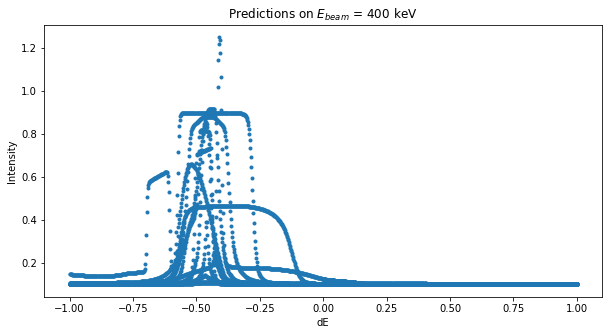

In [249]:
x = extrapolation['dE']
y = extrapolation['D']

plt.figure(figsize=(10,5))
plt.plot(x,y,'.')
plt.xlabel('dE')
plt.ylabel('Intensity')
plt.title('Predictions on $E_{beam}$ = 400 keV')
plt.savefig('Data/Results/04.05.2020/#Predictions_400.png')
plt.show()

## Load interpolation data

In [247]:
path_5 = r'extrapolation_e50000_round1*.csv'

all_files_int = glob.glob(path_1 + path_5)

del all_files_int[5]
del all_files_int[8]

low_energy = []
for filename in all_files_int:
    df = pd.read_csv(filename, delimiter=",", skiprows=1, header=None, usecols=[0,1,2,3], nrows=1000, names=['dE', 'time', 'energy', 'D'])
    low_energy.append(df)
interpolation = pd.concat(low_energy, axis=0, ignore_index=True)
print(max(interpolation['energy']))



1.2


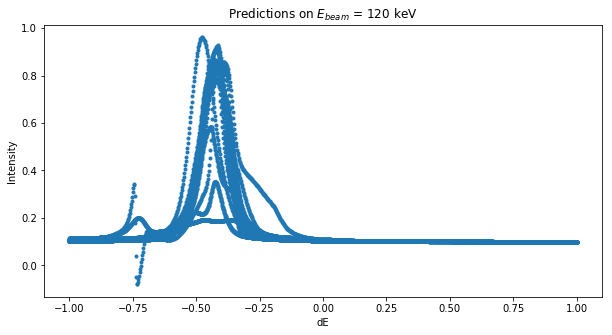

In [248]:
x = interpolation['dE']
y = interpolation['D']

plt.figure(figsize=(10,5))
plt.plot(x,y,'.')
plt.xlabel('dE')
plt.ylabel('Intensity')
plt.title('Predictions on $E_{beam}$ = 120 keV')
#plt.savefig('Data/Results/04.05.2020/#Predictions_80.png')
plt.show()
